# **디스크 컨트롤러**
**문제설명**

하드디스크는 한 번에 하나의 작업만 수행할 수 있습니다. 디스크 컨트롤러를 구현하는 방법은 여러 가지가 있습니다. 가장 일반적인 방법은 요청이 들어온 순서대로 처리하는 것입니다.

예를들어

- 0ms 시점에 3ms가 소요되는 A작업 요청
- 1ms 시점에 9ms가 소요되는 B작업 요청
- 2ms 시점에 6ms가 소요되는 C작업 요청

와 같은 요청이 들어왔습니다. 이를 그림으로 표현하면 아래와 같습니다.

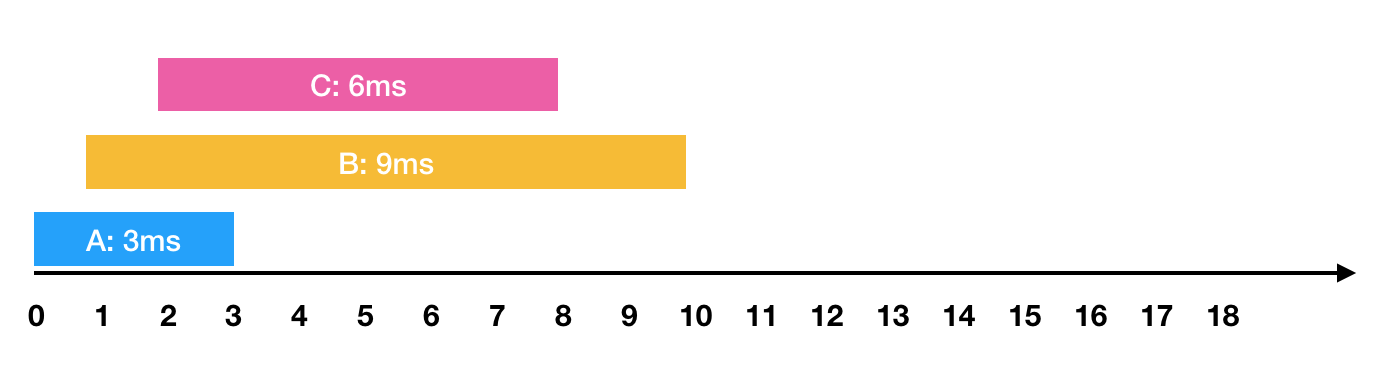

한 번에 하나의 요청만을 수행할 수 있기 때문에 각각의 작업을 요청받은 순서대로 처리하면 다음과 같이 처리 됩니다.

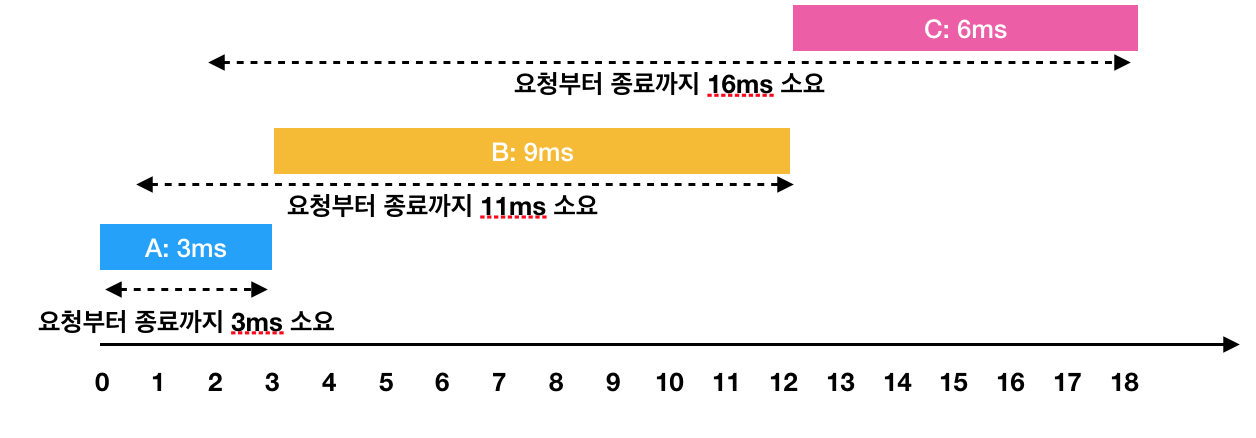

- A: 3ms 시점에 작업 완료 (요청에서 종료까지 : 3ms)
- B: 1ms부터 대기하다가, 3ms 시점에 작업을 시작해서 12ms 시점에 작업 완료(요청에서 종료까지 : 11ms)
- C: 2ms부터 대기하다가, 12ms 시점에 작업을 시작해서 18ms 시점에 작업 완료(요청에서 종료까지 : 16ms)

이 때 각 작업의 요청부터 종료까지 걸린 시간의 평균은 10ms(= (3 + 11 + 16) / 3)가 됩니다.

하지만 A → C → B 순서대로 처리하면

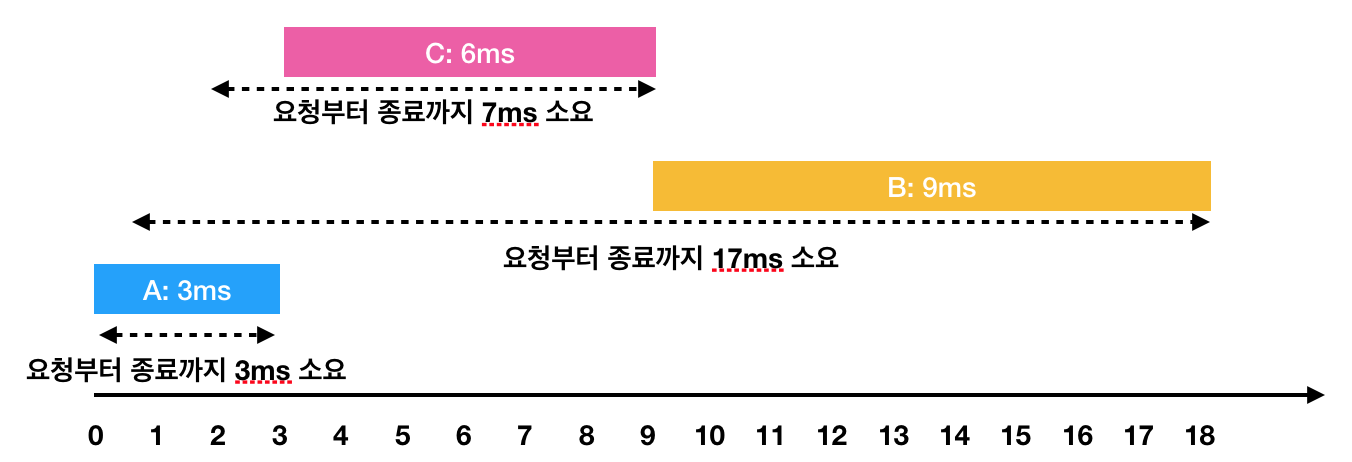

- A: 3ms 시점에 작업 완료(요청에서 종료까지 : 3ms)
- C: 2ms부터 대기하다가, 3ms 시점에 작업을 시작해서 9ms 시점에 작업 완료(요청에서 종료까지 : 7ms)
- B: 1ms부터 대기하다가, 9ms 시점에 작업을 시작해서 18ms 시점에 작업 완료(요청에서 종료까지 : 17ms)

이렇게 A → C → B의 순서로 처리하면 각 작업의 요청부터 종료까지 걸린 시간의 평균은 9ms(= (3 + 7 + 17) / 3)가 됩니다.

각 작업에 대해 [작업이 요청되는 시점, 작업의 소요시간]을 담은 2차원 배열 jobs가 매개변수로 주어질 때, 작업의 요청부터 종료까지 걸린 시간의 평균을 가장 줄이는 방법으로 처리하면 평균이 얼마가 되는지 return 하도록 solution 함수를 작성해주세요. (단, 소수점 이하의 수는 버립니다)

## **제한사항**

*   jobs의 길이는 1 이상 500 이하입니다.
*   jobs의 각 행은 하나의 작업에 대한 [작업이 요청되는 시점, 작업의 소요시간] 입니다.
*   각 작업에 대해 작업이 요청되는 시간은 0 이상 1,000 이하입니다.
*   각 작업에 대해 작업의 소요시간은 1 이상 1,000 이하입니다.
*   하드디스크가 작업을 수행하고 있지 않을 때에는 먼저 요청이 들어온 작업부터 처리합니다.

**입출력 예**

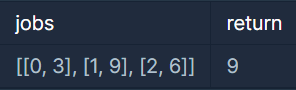

**입출력 예 설명**

문제에 주어진 예와 같습니다.

*   0ms 시점에 3ms 걸리는 작업 요청이 들어옵니다.
*   1ms 시점에 9ms 걸리는 작업 요청이 들어옵니다.
*   2ms 시점에 6ms 걸리는 작업 요청이 들어옵니다.

In [ ]:
#heapq
from heapq import heappop, heappush
def solution(jobs):
    curr = 0
    total = 0
    heap = []
    job_sort = sorted(jobs)
    curr = job_sort[0][0]
    while len(job_sort) > 0 or len(heap) > 0:
        while len(job_sort) > 0:
            if job_sort[0][0] <= curr:
                heappush(heap, (job_sort[0][1], job_sort[0][0]))
                del job_sort[0]
            else:
                break          
        if len(heap) > 0:
            temp = heappop(heap)
            total = total + curr + temp[0] - temp[1]
            curr += temp[0]
        else:
            curr += 1
    answer = int(total/len(jobs))
    return answer